## Advanced Data Augmentation with Keras

- ÌïúÏ†ïÎêú Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º Î¨¥ÏûëÏúÑÎ°ú Î≥ÄÌòï(augmentation)Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÏôÄ Îã§ÏñëÏÑ±ÏùÑ ÎäòÎ†§,
Îî•Îü¨Îãù Î™®Îç∏Ïùò ÏùºÎ∞òÌôî ÏÑ±Îä•ÏùÑ ÎÜíÏù¥Í≥† Í≥ºÏ†ÅÌï©(overfitting)ÏùÑ Î∞©ÏßÄ

170498071/170498071 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 146s 1us/step


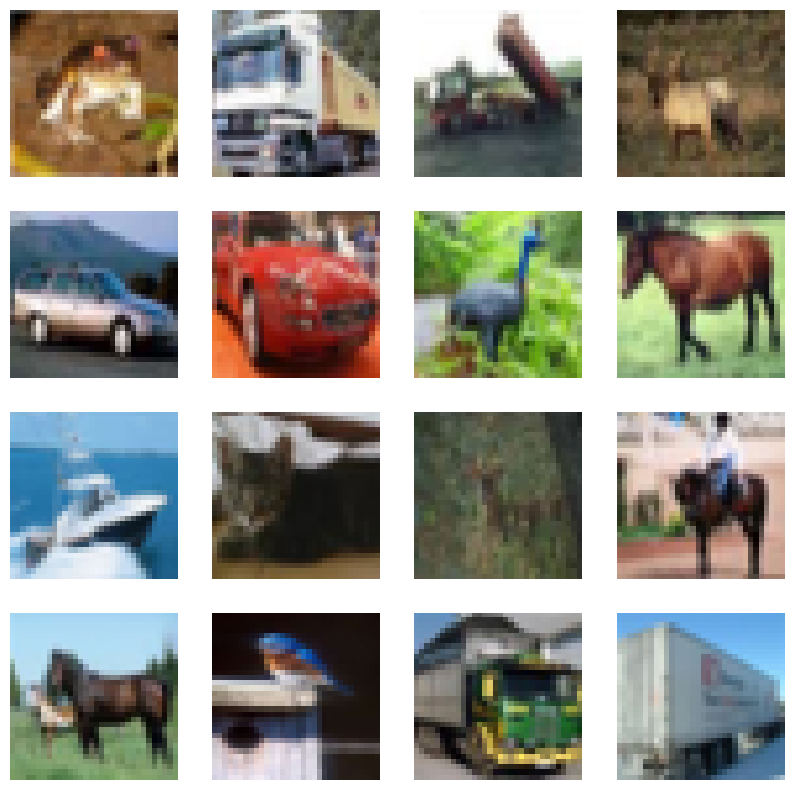

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset for training images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values for augmentation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Display a sample of the training images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [2]:
from PIL import Image, ImageDraw

# Create a blank white image
image = Image.new('RGB', (224, 224), color = (255, 255, 255))

# Draw a red square
draw = ImageDraw.Draw(image)
draw.rectangle([(50, 50), (174, 174)], fill=(255, 0, 0))

# Save the image
image.save('sample.jpg')

ÌååÎùºÎØ∏ÌÑ∞	ÏÑ§Î™Ö
- rotation_range	Ïù¥ÎØ∏ÏßÄ ÌöåÏ†Ñ Î≤îÏúÑ (Ïòà: 40Ïù¥Î©¥ -40ÎèÑ~+40ÎèÑ ÏÇ¨Ïù¥Î°ú ÌöåÏ†Ñ)
- width_shift_range	Ï¢åÏö∞ Ïù¥Îèô Î≤îÏúÑ (ÎπÑÏú® ÎòêÎäî ÌîΩÏÖÄ Ïàò)
- height_shift_range	ÏÉÅÌïò Ïù¥Îèô Î≤îÏúÑ
- shear_range	Í∏∞Ïö∏Í∏∞ Î≥ÄÌôî (shearing transformation)
- zoom_range	ÌôïÎåÄ/Ï∂ïÏÜå ÎπÑÏú® Î≤îÏúÑ
- horizontal_flip	Ï¢åÏö∞ Î∞òÏ†Ñ ÌóàÏö© Ïó¨Î∂Ä
- fill_mode	Ïù¥Îèô/ÌöåÏ†Ñ Îì±ÏúºÎ°ú ÏÉùÍ∏¥ Îπà ÏòÅÏó≠ÏùÑ Ïñ¥ÎñªÍ≤å Ï±ÑÏö∏ÏßÄ ('nearest', 'constant', 'reflect', 'wrap')


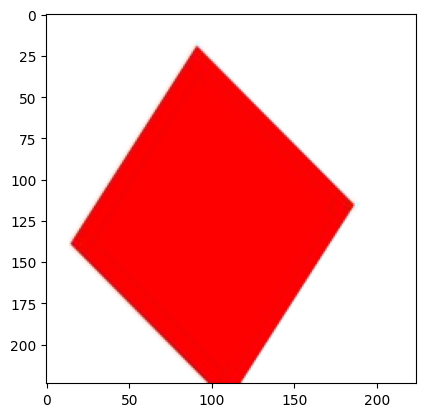

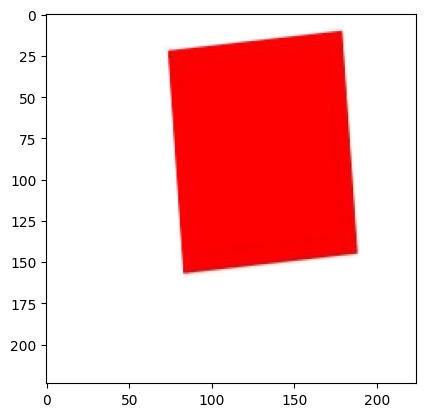

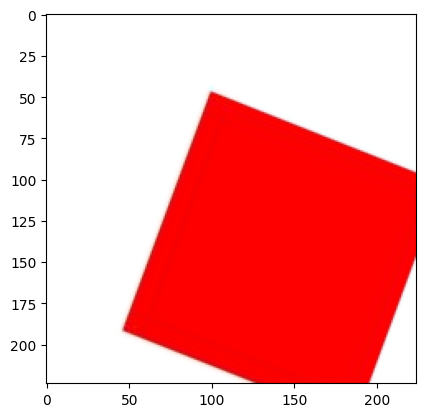

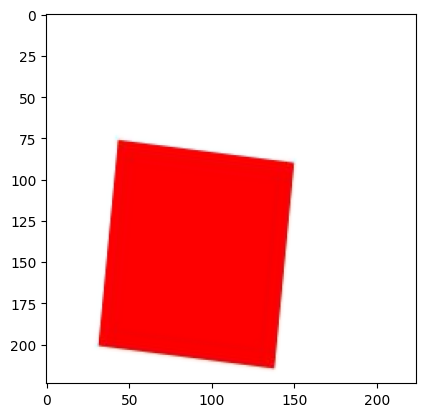

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load the sample image
img_path = 'sample.jpg'
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Create an instance of ImageDataGenerator with basic augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate batches of augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

ÏòµÏÖò	ÏÑ§Î™Ö
- featurewise_center=True	Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌèâÍ∑†ÏùÑ Í∞Å ÏûÖÎ†•ÏóêÏÑú Î∫çÎãàÎã§.
- featurewise_std_normalization=True	Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌëúÏ§ÄÌé∏Ï∞®Î°ú ÎÇòÎàïÎãàÎã§.
- samplewise_center=True	Í∞Å Ïù¥ÎØ∏ÏßÄÏùò ÌèâÍ∑†ÏùÑ Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Î∫çÎãàÎã§.
- samplewise_std_normalization=True	Í∞Å Ïù¥ÎØ∏ÏßÄÏùò ÌëúÏ§ÄÌé∏Ï∞®Î°ú ÎÇòÎàïÎãàÎã§.

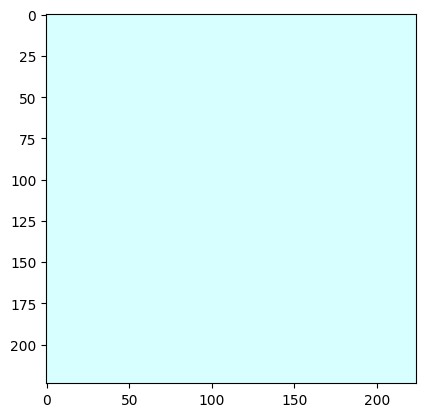

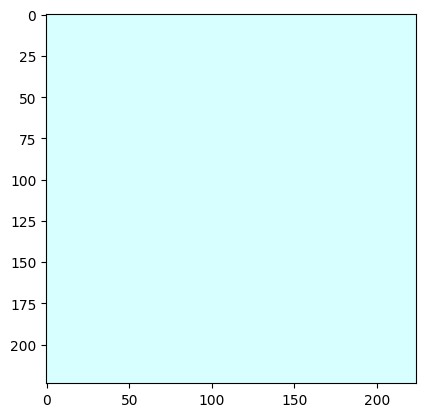

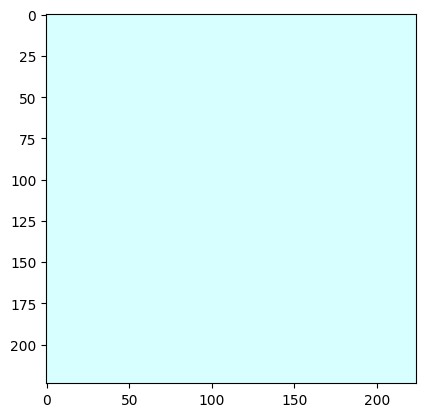

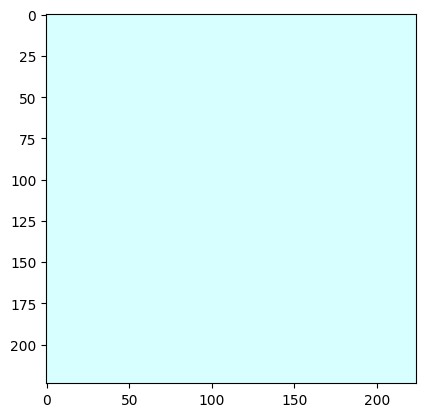

In [5]:
# Create an instance of ImageDataGenerator with normalization options
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Load the sample image again and fit the generator (normally done on the training set)
datagen.fit(x)

# Generate batches of normalized images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

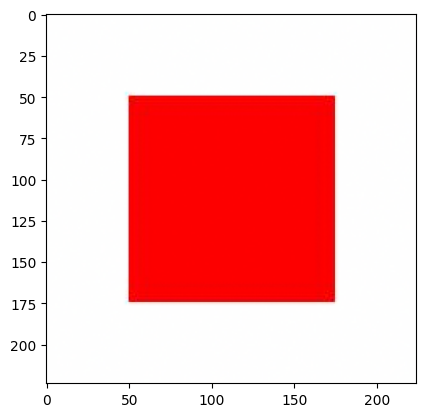

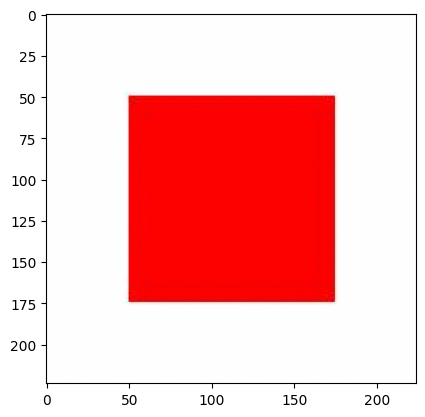

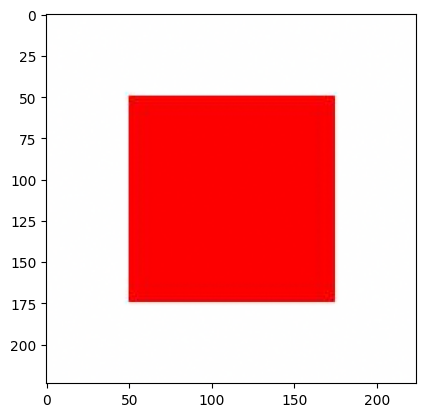

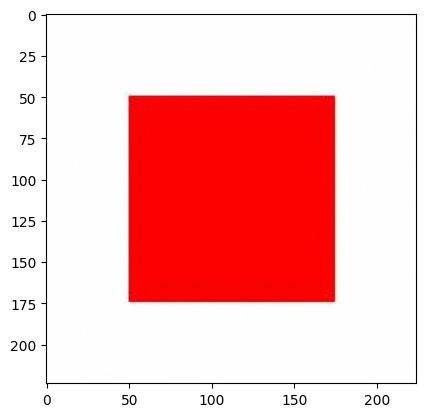

In [6]:
# Define a custom data augmentation function
def add_random_noise(image):
    noise = np.random.normal(0, 0.1, image.shape)
    return image + noise

# Create an instance of ImageDataGenerator with the custom augmentation
datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

# Generate batches of augmented images with noise
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

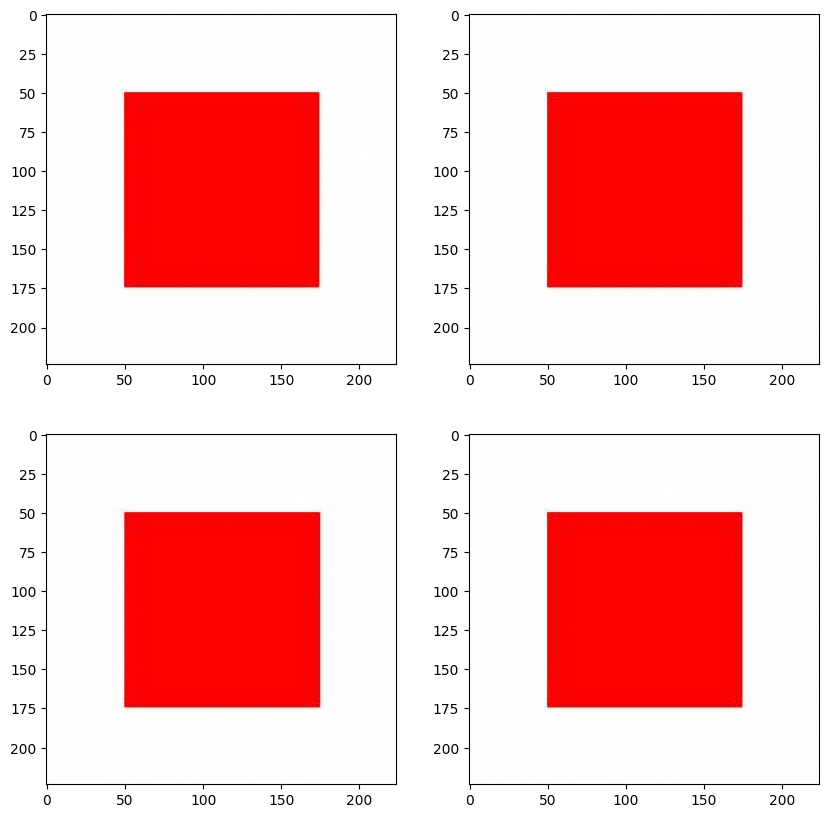

In [7]:
# Visualizing multiple augmented versions of the same image
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i >= 4:  # Show only 4 versions
        break
    plt.subplot(2, 2, i+1)
    plt.imshow(batch[0].astype('uint8'))
plt.show()


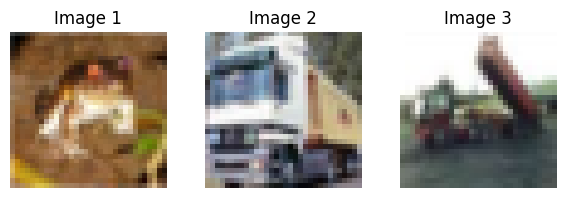

In [10]:
training_images = x_train[:3]

plt.figure(figsize=(6, 2))  
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(training_images[i])
    plt.title(f"Image {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

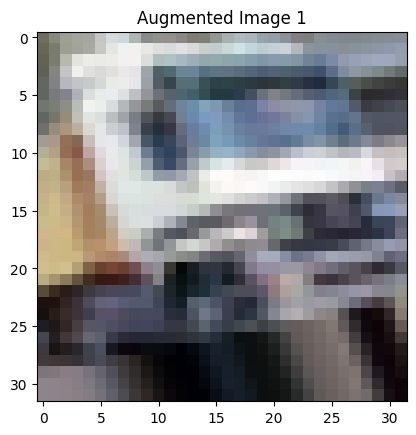

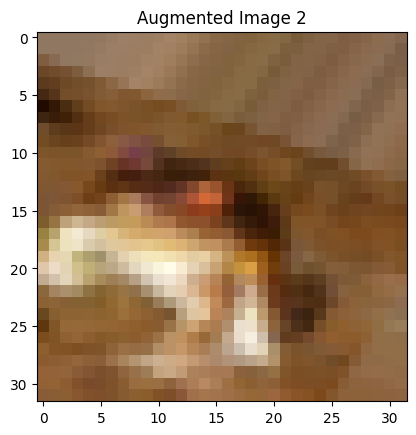

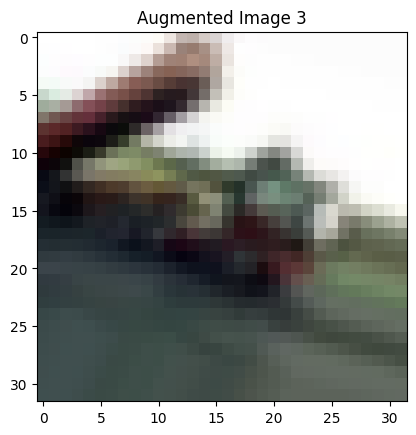

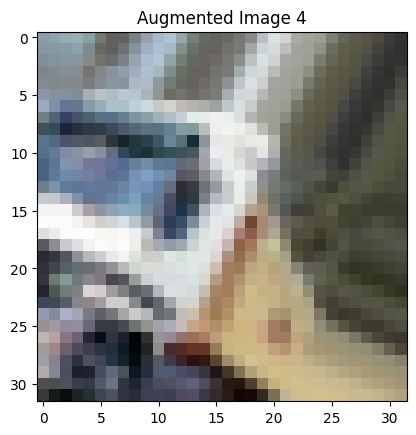

In [9]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img  

import matplotlib.pyplot as plt  

import numpy as np  

 

# Define the augmentation parameters  

datagen = ImageDataGenerator(  

    rotation_range=40,  

    width_shift_range=0.2,  

    height_shift_range=0.2,  

    shear_range=0.2,  

    zoom_range=0.2,  

    horizontal_flip=True,  

    fill_mode='nearest'  

)  



training_images = x_train[:3] 


# Generate and visualize augmented images  

i = 0  

for batch in datagen.flow(training_images, batch_size=1):  

    plt.figure(i)  

    imgplot = plt.imshow(array_to_img(batch[0]))  

    plt.title(f'Augmented Image {i + 1}')  

    i += 1  

    if i % 4 == 0:  

        break  

plt.show()  

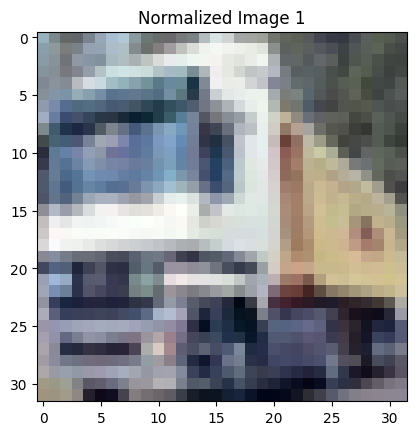

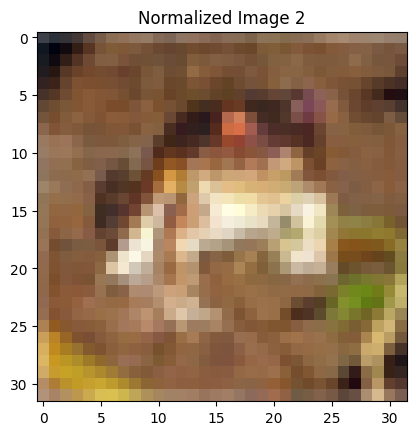

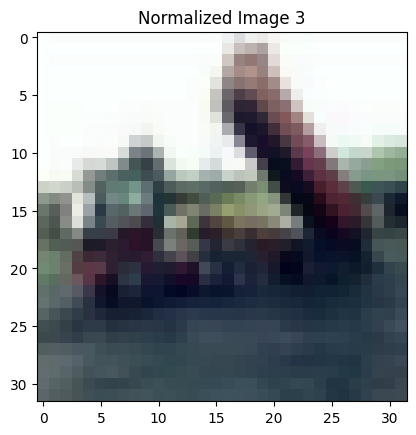

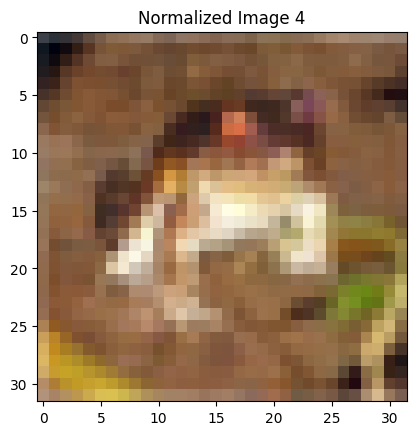

In [11]:
# Create an instance of ImageDataGenerator with normalization options  

datagen = ImageDataGenerator(  

    featurewise_center=True,  

    featurewise_std_normalization=True,  

    samplewise_center=True,  

    samplewise_std_normalization=True  

)  

 

# Fit the ImageDataGenerator to the dataset  

datagen.fit(training_images)  

 

# Generate and visualize normalized images  

i = 0  

for batch in datagen.flow(training_images, batch_size=1):  

    plt.figure(i)  

    imgplot = plt.imshow(array_to_img(batch[0]))  

    plt.title(f'Normalized Image {i + 1}')  

    i += 1  

    if i % 4 == 0:  

        break  

plt.show()  

Ïù¥ ÏΩîÎìúÏóêÏÑúÎäî "Ï†ïÍ∑úÌôî(normalization)"Î•º ÏàòÌñâÌïòÍ≥† ÏûàÏäµÎãàÎã§.
Ï†ïÍ∑úÌôîÎäî ÏÇ¨Îûå ÎààÏóê ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏñ¥ Î≥¥Ïó¨ÎèÑ, Î™®Îç∏Ïù¥ ÌïôÏäµÌïòÍ∏∞ Ìõ®Ïî¨ Îçî Ïâ¨ÏõåÏßÄÎèÑÎ°ù Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏπòÏ†ÅÏúºÎ°ú Ï†ïÎ¶¨Ìï¥Ï£ºÎäî Í≥ºÏ†ïÏù¥ÏóêÏöî.

üîç Ï†ïÍ∑úÌôî vs Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùò Ï∞®Ïù¥

**Ï†ïÍ∑úÌôî(Normalization)**	Ïù¥ÎØ∏ÏßÄÏùò ÌèâÍ∑†/ÌëúÏ§ÄÌé∏Ï∞®Î•º ÎßûÏ∂îÍ±∞ÎÇò, Í∞í Î≤îÏúÑÎ•º Ï†ïÎ¶¨Ìï¥ÏÑú ÌïôÏäµ ÏïàÏ†ïÏÑ± Ìñ•ÏÉÅ	Í±∞Ïùò Ï∞®Ïù¥ ÏóÜÏùå (ÌùêÎ¶øÌïòÍ±∞ÎÇò ÏïΩÍ∞Ñ Î∞ùÍ∏∞ Î≥ÄÌôî ÏûàÏùÑ Ïàò ÏûàÏùå)	‚úÖ Í≥ÑÏÇ∞Ïù¥ Ìé∏Ìï¥ÏßÄÍ≥† ÏàòÎ†¥Ïù¥ Îπ®ÎùºÏßê

**Ï¶ùÍ∞ï(Augmentation)**	ÌöåÏ†Ñ, ÌôïÎåÄ, Î∞òÏ†Ñ Îì± ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú "ÏÉà Ïù¥ÎØ∏ÏßÄÏ≤òÎüº" ÎßåÎì§Ïñ¥ÏÑú Îç∞Ïù¥ÌÑ∞ Îã§ÏñëÏÑ± Ìñ•ÏÉÅ	Ï∞®Ïù¥ Î™ÖÌôïÌï® (ÏÉàÎ°úÏö¥ Ïù¥ÎØ∏ÏßÄÏ≤òÎüº Î≥¥ÏûÑ)	‚úÖ Í≥ºÏ†ÅÌï© Î∞©ÏßÄ, ÏùºÎ∞òÌôî Ìñ•ÏÉÅ

üß† Ïôú Ï†ïÍ∑úÌôîÍ∞Ä Ï§ëÏöîÌïúÍ∞Ä?
Ïù¥ÎØ∏ÏßÄ ÌîΩÏÖÄ Í∞íÏùÄ Î≥¥ÌÜµ 0~255 Î≤îÏúÑÏòàÏöî.

Î™®Îç∏ÏùÄ Ïù¥Îü∞ ÌÅ∞ ÏàòÎ≥¥Îã§ ÌèâÍ∑†Ïù¥ 0Ïóê Í∞ÄÍπùÍ≥†, Î∂ÑÏÇ∞Ïù¥ ÏûëÏùÄ Ïà´ÏûêÎ°ú ÏûÖÎ†•Î∞õÏùÑ Îïå Îçî ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÌïôÏäµÌï©ÎãàÎã§.

ÌäπÌûà Îî•Îü¨ÎãùÏùÄ weight ÏóÖÎç∞Ïù¥Ìä∏Í∞Ä ÏûëÏùÄ Î≥ÄÌôîÏóê ÎØºÍ∞êÌïòÎØÄÎ°ú, ÏûÖÎ†•Ïùò Î∂ÑÌè¨Î•º Ï†ïÍ∑úÌôîÌï¥Ï£ºÎäî Í≤å Ï§ëÏöîÌï¥Ïöî.


ÌïòÏßÄÎßå ÏãúÍ∞ÅÌôîÌï† Îïê Îã§Ïãú 0~255 Î≤îÏúÑÎ°ú ÎßûÏ∂îÍ±∞ÎÇò array_to_img() Í∞ôÏùÄ Î≥ÄÌôòÏùÑ Ìï¥Ï§òÏïº ÎààÏóê Ïûò Î≥¥Ïó¨Ïöî.

‚úÖ Í≤∞Î°†
ÎÑ§, Ïù¥ ÏΩîÎìúÏóêÏÑú ÎßåÎì§Ïñ¥ÏßÑ Ï†ïÍ∑úÌôîÎêú Ïù¥ÎØ∏ÏßÄÎäî ÏÇ¨ÎûåÏù¥ Î¥§ÏùÑ Îïê Í±∞Ïùò Ï∞®Ïù¥ ÏóÜÏñ¥ Î≥¥Ïù¥ÏßÄÎßå,
Î™®Îç∏ ÏûÖÏû•ÏóêÏÑúÎäî Ìõ®Ïî¨ Îçî Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏâΩÍ≥† ÌïôÏäµÌïòÍ∏∞ Ï¢ãÏùÄ ÌòïÌÉúÎ°ú Î∞îÎÄê Í±∞ÏòàÏöî.

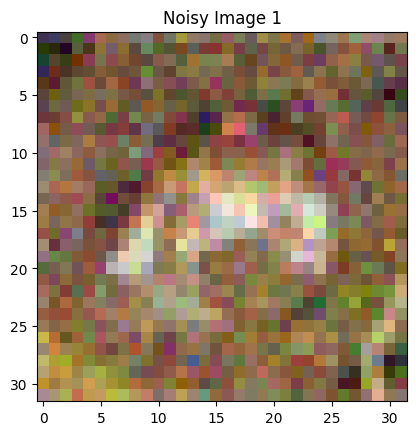

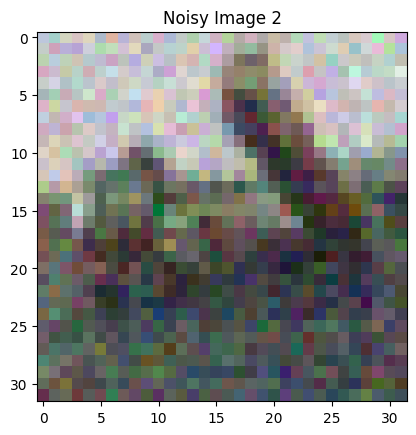

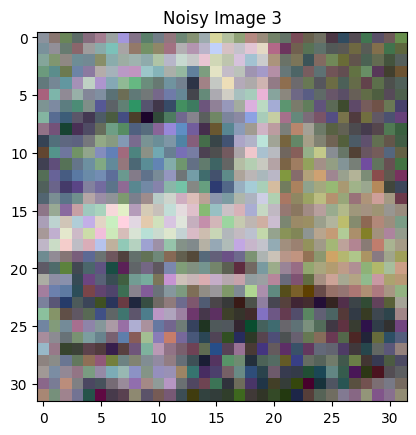

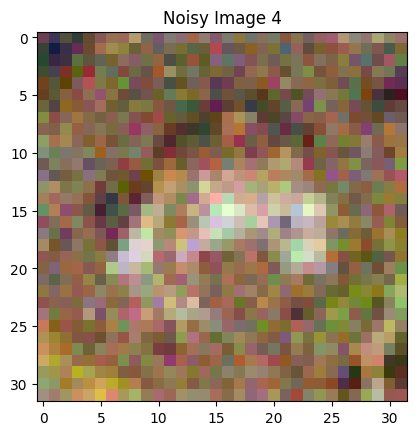

In [12]:
# Define a custom augmentation function to add random noise  

def add_random_noise(image):  

    noise = np.random.normal(0, 0.1, image.shape)  

    return image + noise  

 

# Create an instance of ImageDataGenerator with custom augmentation  

datagen = ImageDataGenerator(preprocessing_function=add_random_noise)  

 

# Generate and visualize augmented images  

i = 0  

for batch in datagen.flow(training_images, batch_size=1):  

    plt.figure(i)  

    imgplot = plt.imshow(array_to_img(batch[0]))  

    plt.title(f'Noisy Image {i + 1}')  

    i += 1  

    if i % 4 == 0:  

        break  

plt.show()  